In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the training dataset
data= pandas.read_csv('/content/gdrive/My Drive/Datasets/Housing prices prediction/train.csv', engine= 'python')
# Shape of training dataset
data.shape

(1460, 81)

In [ ]:
# Viewing first 2 rows of dataframe
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
del data['Id']   # as it is only for indexing purpose

In [ ]:
# Checking null values in the dataframe
pandas.set_option('display.max_rows', 80)
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [ ]:
del data['Alley']           # 1369 null values out of 1460 dataframe length
del data['PoolQC']           # 1453 null values out of 1460 dataframe length
del data['Fence']            # 1179 null values out of 1460 dataframe length
del data['MiscFeature']      # 1406 null values out of 1460 dataframe length

In [ ]:
# Treating null values
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace= True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace= True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace= True)

In [ ]:
data['BsmtQual'].fillna(data['BsmtQual'].mode().values[0], inplace= True)
data['BsmtCond'].fillna(data['BsmtCond'].mode().values[0], inplace= True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode().values[0], inplace= True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode().values[0], inplace= True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode().values[0], inplace= True)
data['MasVnrType'].fillna(data['MasVnrType'].mode().values[0], inplace= True)
data['Electrical'].fillna(data['Electrical'].mode().values[0], inplace= True)
data['FireplaceQu'].fillna(data['FireplaceQu'].mode().values[0], inplace= True)
data['GarageType'].fillna(data['GarageType'].mode().values[0], inplace= True)
data['GarageFinish'].fillna(data['GarageFinish'].mode().values[0], inplace= True)
data['GarageQual'].fillna(data['GarageQual'].mode().values[0], inplace= True)
data['GarageCond'].fillna(data['GarageCond'].mode().values[0], inplace= True)

In [ ]:
# Checking duplicate values in the dataframe
data.duplicated().sum()

0

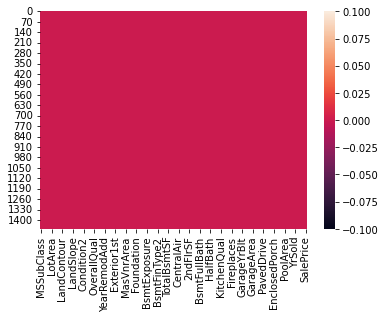

In [ ]:
# Seaborn plot of null values
seaborn.heatmap(data.isnull())
plt.show()

In [ ]:
# Scaling 'year' data columns
data['YearBuilt']= data['YearBuilt']- data['YearBuilt'].min()
data['YearRemodAdd']= data['YearRemodAdd']- data['YearRemodAdd'].min()
data['GarageYrBlt']= data['GarageYrBlt']- data['GarageYrBlt'].min()
data['YrSold']= data['YrSold']- data['YrSold'].min()

In [ ]:
# Information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
# Description of dataframe
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,99.267808,34.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,78.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,1.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,82.000000,17.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,62.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,101.000000,44.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,80.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,128.000000,54.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,101.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,138.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,110.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,4.000000,755000.000000


In [ ]:
# Correlation matrix
correlation= data.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.179042,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179042,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.247621,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


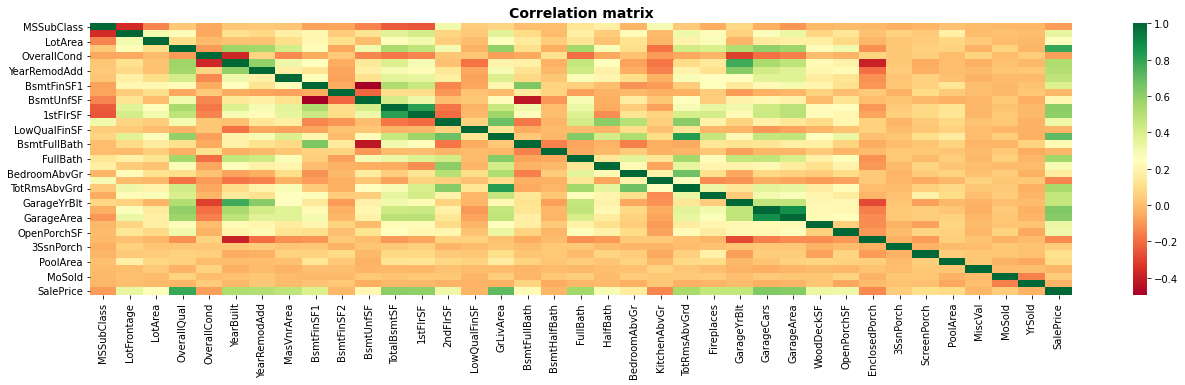

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize= (22, 5))
seaborn.heatmap(correlation, cmap= 'RdYlGn')
plt.title('Correlation matrix', fontsize= 14, fontweight= 'bold')
plt.show()

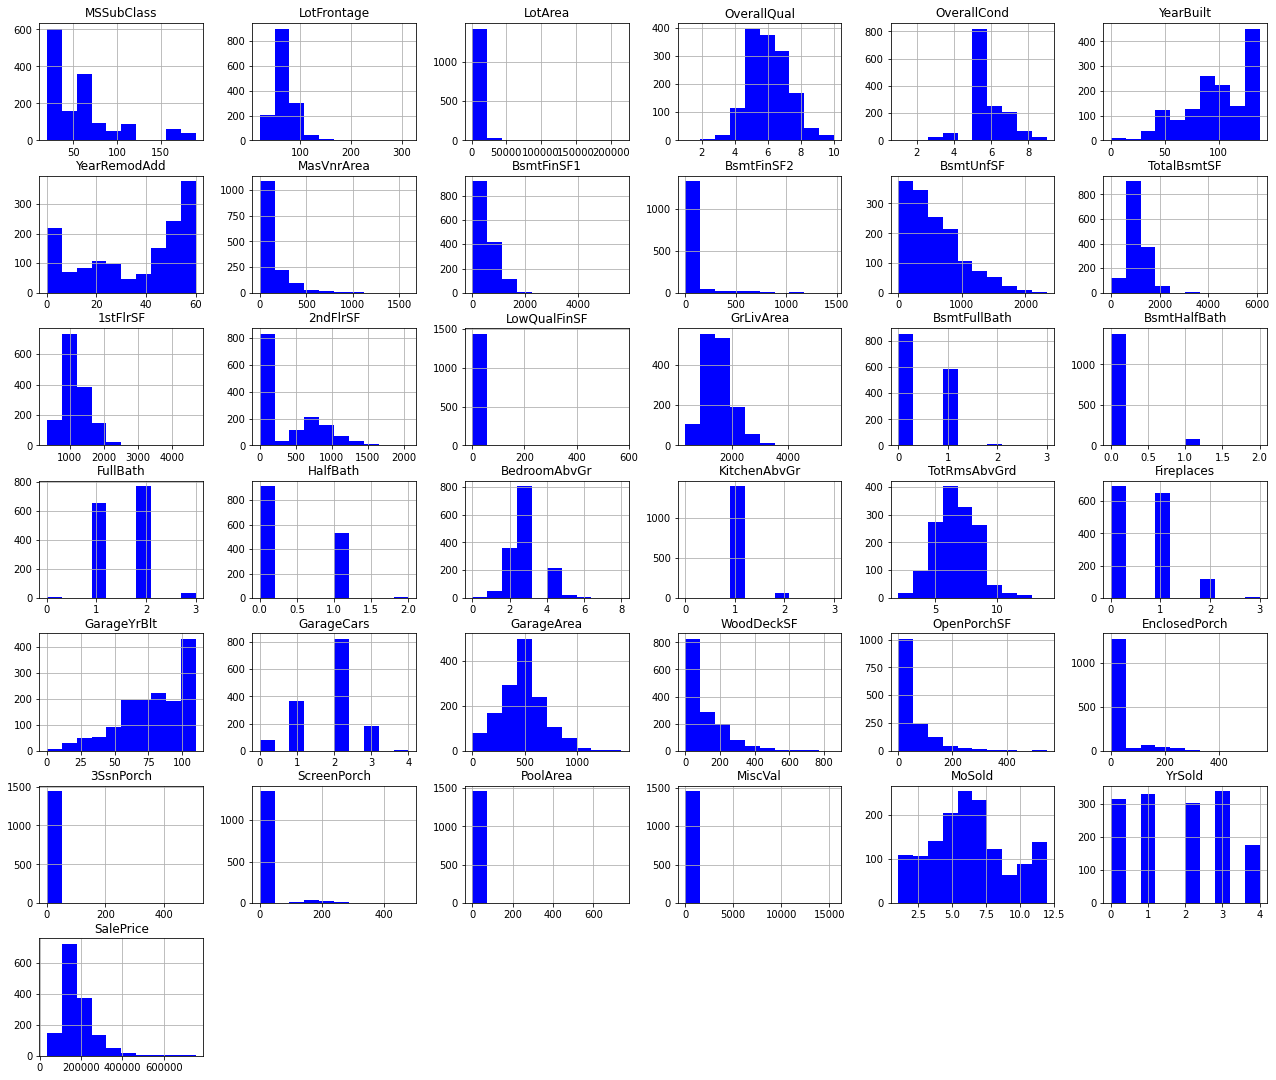

In [ ]:
# Histogram plot of variables
data.hist(figsize= (22, 19), color= 'blue')
plt.show()

In [ ]:
# Number of unique values in various columns
data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

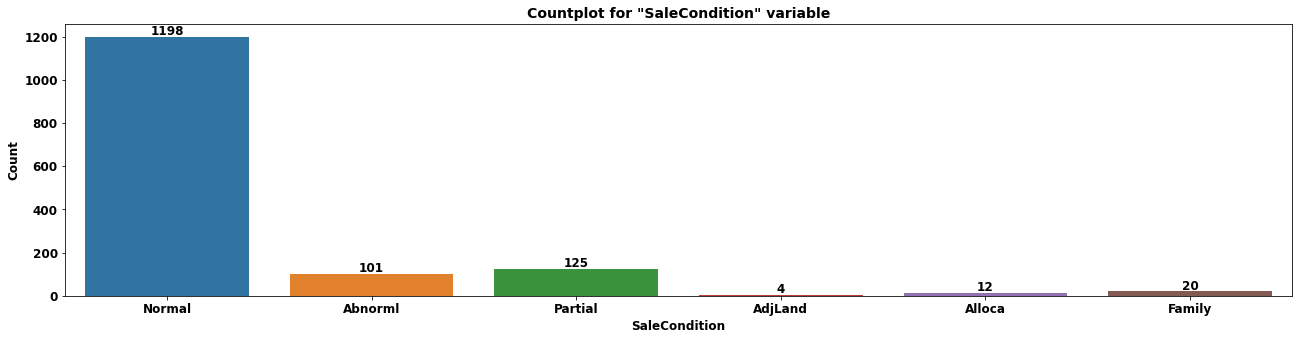

In [ ]:
# Countplot for 'SaleCondition' variable
plt.figure(figsize= (22, 5))
axes= seaborn.countplot(data['SaleCondition'])
plt.title('Countplot for "SaleCondition" variable', fontsize= 14, fontweight= 'bold')
plt.xlabel('SaleCondition', fontsize= 12, fontweight= 'bold')
plt.ylabel('Count', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
for a in axes.patches:
  axes.text(( a.get_x()+ a.get_width()/2 ), ( a.get_height() + 10 ), a.get_height() , horizontalalignment='center', fontsize = 12, fontweight= 'bold')
plt.show()

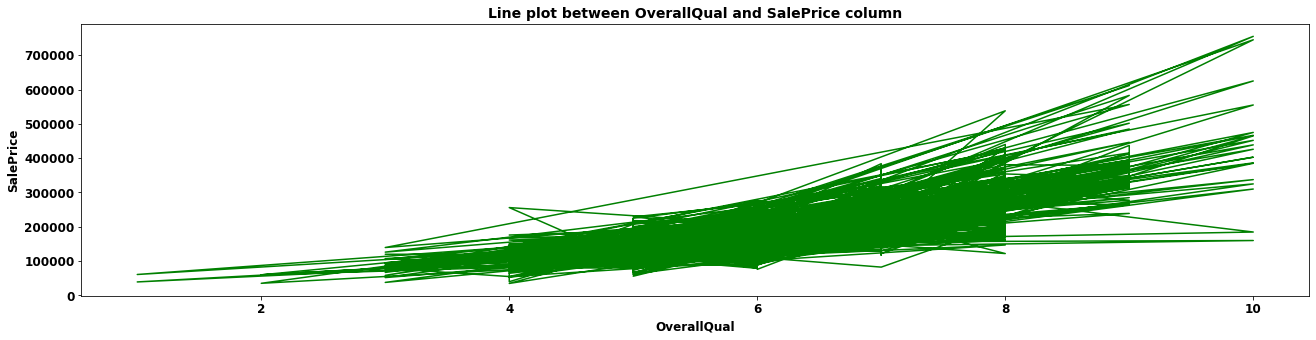

In [ ]:
# Line plot
plt.figure(figsize= (22, 5))
plt.plot(data['OverallQual'], data['SalePrice'], color= 'green')      # Correlation value : 0.790982
plt.title('Line plot between OverallQual and SalePrice column', fontsize= 14, fontweight= 'bold')
plt.xlabel('OverallQual', fontsize= 12, fontweight= 'bold')
plt.ylabel('SalePrice', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.show()

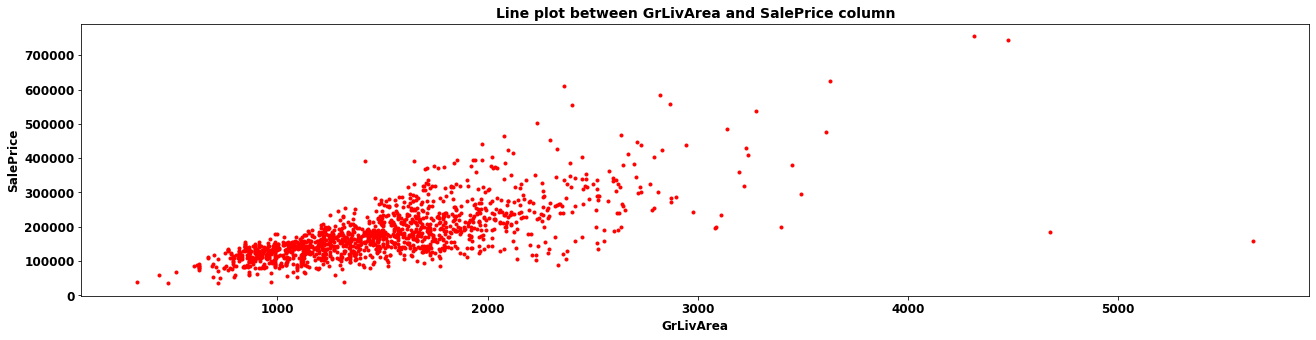

In [ ]:
# Scatter plot
plt.figure(figsize= (22, 5))
plt.scatter(data['GrLivArea'], data['SalePrice'], color= 'red', marker= '.')      # Correlation value : 0.708624
plt.title('Line plot between GrLivArea and SalePrice column', fontsize= 14, fontweight= 'bold')
plt.xlabel('GrLivArea', fontsize= 12, fontweight= 'bold')
plt.ylabel('SalePrice', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.show()

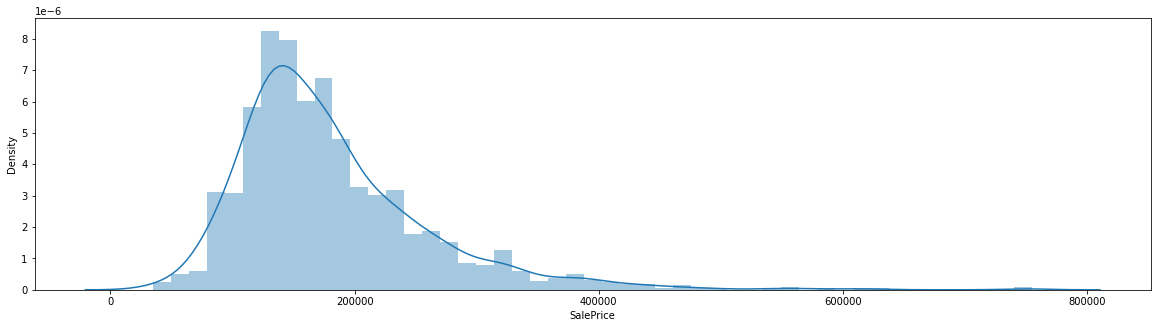

In [ ]:
# Distribution plot for SalePrice variable in the dataframe. 
# kde (Kernel Density Estimate) : It gives us probability density function
# bins denotes in how many parts our data is distributed
plt.figure(figsize= (20,5))
seaborn.distplot(data['SalePrice'], kde=True)
plt.show()

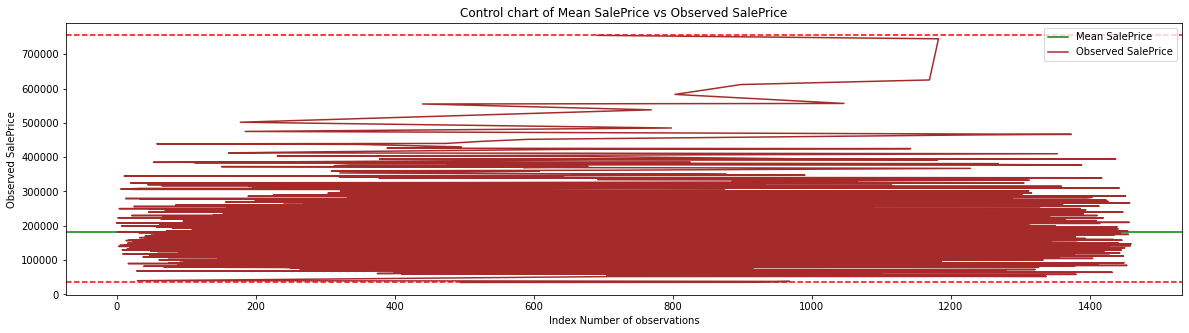

In [ ]:
# Control chart of Mean SalePrice vs Observed SalePrice
plt.figure(figsize= (20, 5) )
plt.axhline(y = data['SalePrice'].mean(), color = 'green', linestyle = '-', linewidth= 1.5, label= 'Mean SalePrice')
plt.axhline(y = data['SalePrice'].min(), color = 'red', linestyle = '--', linewidth= 1.5)
plt.axhline(y = data['SalePrice'].max(), color = 'red', linestyle = '--', linewidth= 1.5)
data['SalePrice'].sort_values(ascending= True).plot(color= 'brown', label= 'Observed SalePrice')
plt.title('Control chart of Mean SalePrice vs Observed SalePrice')
plt.xlabel('Index Number of observations')
plt.ylabel('Observed SalePrice')
plt.legend()
plt.show()

In [ ]:
# Numerical data column names
data.select_dtypes(exclude= 'object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# Categorical data column names
data.select_dtypes(include= 'object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

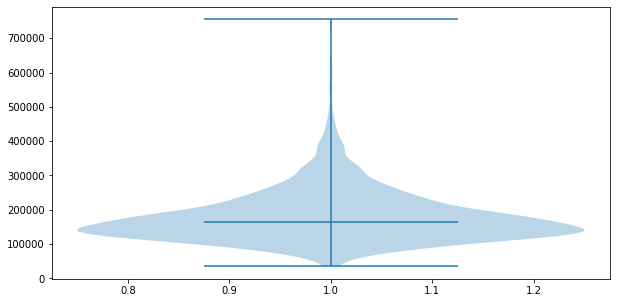

In [ ]:
# Violin plot of SalePrice variable
plt.figure(figsize= (10, 5) )
plt.violinplot(data['SalePrice'], showmedians= True)
plt.show()

In [ ]:
# Applying One Hot Encoding on categorical variables in training data
dummy_data= data
for x in data.select_dtypes(include= 'object').columns:
  dummy_data= pandas.get_dummies(dummy_data, columns= [x])

dummy_data.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,131,53,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,103.0,2,548,0,61,0,0,0,0,0,2,2,208500,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,104,26,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,76.0,2,460,298,0,0,0,0,0,0,5,1,181500,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Importing the testing dataset
test_data= pandas.read_csv('/content/gdrive/My Drive/Datasets/Housing prices prediction/test.csv', engine= 'python')
# Shape of dataset
test_data.shape

(1459, 80)

In [ ]:
# Viewing first 2 rows of dataframe
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [ ]:
del test_data['Id']   # as it is only for indexing purpose
# Checking null values in the dataframe
test_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [ ]:
del test_data['Alley']            # 1352 null values out of 1459 dataframe length
del test_data['PoolQC']           # 1456 null values out of 1459 dataframe length
del test_data['Fence']            # 1169 null values out of 1459 dataframe length
del test_data['MiscFeature']      # 1408 null values out of 1459 dataframe length

In [ ]:
# Treating null values
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace= True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(), inplace= True)
test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].median(), inplace= True)
test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].median(), inplace= True)
test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].median(), inplace= True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median(), inplace= True)
test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].median(), inplace= True)
test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].median(), inplace= True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace= True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(), inplace= True)
test_data['GarageArea'].fillna(test_data['GarageArea'].median(), inplace= True)

In [ ]:
test_data['MSZoning'].fillna(test_data['MSZoning'].mode().values[0], inplace= True)
test_data['Utilities'].fillna(test_data['Utilities'].mode().values[0], inplace= True)
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode().values[0], inplace= True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode().values[0], inplace= True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode().values[0], inplace= True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode().values[0], inplace= True)
test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode().values[0], inplace= True)
test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode().values[0], inplace= True)
test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode().values[0], inplace= True)
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode().values[0], inplace= True)
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode().values[0], inplace= True)
test_data['Functional'].fillna(test_data['Functional'].mode().values[0], inplace= True)
test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode().values[0], inplace= True)
test_data['GarageType'].fillna(test_data['GarageType'].mode().values[0], inplace= True)
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode().values[0], inplace= True)
test_data['GarageQual'].fillna(test_data['GarageQual'].mode().values[0], inplace= True)
test_data['GarageCond'].fillna(test_data['GarageCond'].mode().values[0], inplace= True)
test_data['SaleType'].fillna(test_data['SaleType'].mode().values[0], inplace= True)

In [ ]:
# Checking duplicate values in the dataframe
test_data.duplicated().sum()

0

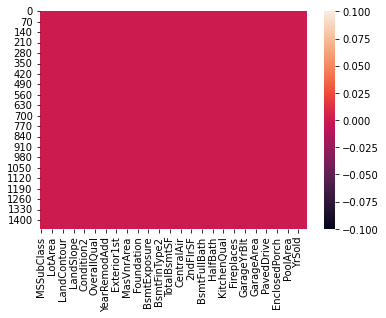

In [ ]:
# Seaborn plot of null values
seaborn.heatmap(test_data.isnull())
plt.show()

In [ ]:
# Scaling 'year' data columns
test_data['YearBuilt']= test_data['YearBuilt']- test_data['YearBuilt'].min()
test_data['YearRemodAdd']= test_data['YearRemodAdd']- test_data['YearRemodAdd'].min()
test_data['GarageYrBlt']= test_data['GarageYrBlt']- test_data['GarageYrBlt'].min()
test_data['YrSold']= test_data['YrSold']- test_data['YrSold'].min()

In [ ]:
# Categorical test_data column names
test_data.select_dtypes(include= 'object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Applying One Hot Encoding on categorical variables in test_data
dummy_test_data= test_data
for x in test_data.select_dtypes(include= 'object').columns:
  dummy_test_data= pandas.get_dummies(dummy_test_data, columns= [x])

dummy_test_data.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,82,11,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,66.0,1.0,730.0,140,0,0,0,120,0,0,6,4,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,79,8,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,63.0,1.0,312.0,393,36,0,0,0,0,12500,6,4,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Feature extraction
features= []
for a in dummy_data.columns:
  if a in dummy_test_data.columns:
    features.append(a)

x= dummy_data[features]
y= dummy_data[['SalePrice']]
testing_set= dummy_test_data[features]

In [ ]:
# Splitting x, y from 'dummy_data' dataframe into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.05, random_state= 1)
print('Independent training set shape is :', x_train.shape)
print('Independent testing set shape is :', x_test.shape)
print('Dependent training set shape is :', y_train.shape)
print('Dependent testing set shape is :', y_test.shape)

Independent training set shape is : (1387, 259)
Independent testing set shape is : (73, 259)
Dependent training set shape is : (1387, 1)
Dependent testing set shape is : (73, 1)


In [ ]:
# Decision Tree Regressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_train_accuracy= ( r2_score(y_train, dtr.predict(x_train)) ).round(decimals= 5)
print('Decision Tree Regressor training accuracy in % is :', dtr_train_accuracy* 100 )
y_pred= dtr.predict(x_test)
dtr_testing_accuracy= ( r2_score(y_test, y_pred) ).round(decimals= 5)
print('Decision Tree Regressor testing accuracy in % is :', dtr_testing_accuracy* 100 )
print('Decision Tree Regressor Mean absolute error is :', (mean_absolute_error(y_test, y_pred)).round(decimals= 3) )
print('Decision Tree Regressor Mean squared error is :', (mean_squared_error(y_test, y_pred)).round(decimals= 3) )
print('Decision Tree Regressor Root mean squared error is :', (numpy.sqrt(mean_squared_error(y_test, y_pred))).round(decimals= 3) )

Decision Tree Regressor training accuracy in % is : 100.0
Decision Tree Regressor testing accuracy in % is : 82.736
Decision Tree Regressor Mean absolute error is : 23624.767
Decision Tree Regressor Mean squared error is : 1196852992.712
Decision Tree Regressor Root mean squared error is : 34595.563


In [ ]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_train_accuracy= ( r2_score(y_train, lr.predict(x_train)) ).round(decimals= 5)
print('Linear Regression training accuracy in % is :', lr_train_accuracy* 100 )
y_pred= lr.predict(x_test)
lr_testing_accuracy= ( r2_score(y_test, y_pred) ).round(decimals= 5)
print('Linear Regression testing accuracy in % is :', lr_testing_accuracy* 100 )
print('Linear Regression Mean absolute error is :', (mean_absolute_error(y_test, y_pred)).round(decimals= 3) )
print('Linear Regression Mean squared error is :', (mean_squared_error(y_test, y_pred)).round(decimals= 3) )
print('Linear Regression Root mean squared error is :', (numpy.sqrt(mean_squared_error(y_test, y_pred))).round(decimals= 3) )

Linear Regression training accuracy in % is : 90.982
Linear Regression testing accuracy in % is : 90.575
Linear Regression Mean absolute error is : 19258.244
Linear Regression Mean squared error is : 653392052.083
Linear Regression Root mean squared error is : 25561.535


In [ ]:
# Random Forest Regressor
rfr= RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_train_accuracy= ( r2_score(y_train, rfr.predict(x_train)) ).round(decimals= 5)
print('Random Forest Regressor training accuracy in % is :', rfr_train_accuracy* 100 )
y_pred= rfr.predict(x_test)
rfr_testing_accuracy= ( r2_score(y_test, y_pred) ).round(decimals= 5)
print('Random Forest Regressor testing accuracy in % is :', rfr_testing_accuracy* 100 )
print('Random Forest Regressor Mean absolute error is :', (mean_absolute_error(y_test, y_pred)).round(decimals= 3) )
print('Random Forest Regressor Mean squared error is :', (mean_squared_error(y_test, y_pred)).round(decimals= 3) )
print('Random Forest Regressor Root mean squared error is :', (numpy.sqrt(mean_squared_error(y_test, y_pred))).round(decimals= 3) )

Random Forest Regressor training accuracy in % is : 98.095
Random Forest Regressor testing accuracy in % is : 95.742
Random Forest Regressor Mean absolute error is : 12813.941
Random Forest Regressor Mean squared error is : 295209822.304
Random Forest Regressor Root mean squared error is : 17181.671


In [ ]:
# Ada Boost Regressor
ada= AdaBoostRegressor(base_estimator= rfr, n_estimators= 15, learning_rate= 1, random_state= 1)
ada.fit(x_train, y_train)
ada_train_accuracy= ( r2_score(y_train, ada.predict(x_train)) ).round(decimals= 5)
print('Ada Boost Regressor training accuracy in % is :', ada_train_accuracy* 100 )
y_pred= ada.predict(x_test)
ada_testing_accuracy= ( r2_score(y_test, y_pred) ).round(decimals= 5)
print('Ada Boost Regressor testing accuracy in % is :', ada_testing_accuracy* 100 )
print('Ada Boost Regressor Mean absolute error is :', (mean_absolute_error(y_test, y_pred)).round(decimals= 3) )
print('Ada Boost Regressor Mean squared error is :', (mean_squared_error(y_test, y_pred)).round(decimals= 3) )
print('Ada Boost Regressor Root mean squared error is :', (numpy.sqrt(mean_squared_error(y_test, y_pred))).round(decimals= 3) )

Ada Boost Regressor training accuracy in % is : 99.456
Ada Boost Regressor testing accuracy in % is : 96.237
Ada Boost Regressor Mean absolute error is : 12093.886
Ada Boost Regressor Mean squared error is : 260859085.695
Ada Boost Regressor Root mean squared error is : 16151.133


In [ ]:
# Using Ada Boost Regressor for predicting SalePrice values in testing set due to its high accuracy score
Output_predicted_SalePrice= ada.predict(testing_set)
Output_predicted_SalePrice= pandas.DataFrame({ 'Id': 1461 , 'Predicted SalePrice' : Output_predicted_SalePrice })
Output_predicted_SalePrice.head(3)

,Id,Predicted SalePrice
0,1461,129637.36
1,1461,155750.50
2,1461,179905.77


In [ ]:
# Shape of Output_predicted_SalePrice dataframe
Output_predicted_SalePrice.shape

(1459, 2)

In [ ]:
for i in range(len(Output_predicted_SalePrice)):
  Output_predicted_SalePrice['Id'][i]= Output_predicted_SalePrice['Id'][i] + i

In [ ]:
Output_predicted_SalePrice

,Id,Predicted SalePrice
0,1461,129637.36
1,1462,155750.50
2,1463,179905.77
3,1464,182700.50
4,1465,194561.12
...,...,...
1454,2915,88166.36
1455,2916,91215.42
1456,2917,155834.57
1457,2918,118345.93


In [ ]:
# Downloading Output_predicted_SalePrice dataframe as csv file
Output_predicted_SalePrice.to_csv('Output_predicted_SalePrice.csv')
files.download('Output_predicted_SalePrice.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from termcolor import colored
print(colored('Thank you for reading this !', 'green', attrs= ['bold']))

Thank you for reading this !
